**COSC 301 - Bonus Assignment**

In this bonus assignment, you will have the chance to demonstate skills aquired during the course in using Python and Colab for data analysis and visualization.   

**The bonus assignment can be done in groups of two (2).**

There is a lot of flexibility in terms of what you can do for bonus assignment, as long as it meets/satisfies the items outlined in the rubric.  The work must involve numerous steps (you just can't load and plot the data) including loading, cleanging, extracting key features, analysis and visualization.  

The key requirements:

1. Find a dataset of interest (must be something different from what we’ve used in class, but could be from another course you are taking or a different dataset that you’ve worked with).  Provide a brief description of what the dataset represents and what is it that you intend to examine.
2. Load the data into Colab (this could be a file that you upload, fetched using an API, or scraped using Scrapy or BeautifulSoup.
3. The goal is to provide some analysis and visualization of the data using the tools examined this term in Python as well as some additional tools. Besides using the libraries introduced in the course, you will need to use at least two (2) new/additional libraries (ie could be for data storage, scraping or visualization) but can include features not covered in libraries that we did talk about (ie GeoPandas).   
4. In addition to a basic visualization, construct an interactive visualization allowing the user to explore your visualizations interactively.
5. Clearly label items/steps in your notebook, describing/discussing what you are doing.    

There are a number of different libraries that you might choose to explore.  Here is a list (but a bit of searching on the Internet will return lots of differnet options).  Explore and use the libraries used in class as well as other packages used in data science such as:

 * UMAP (https://umap-learn.readthedocs.io/en/latest/)
 * Datatabe (https://datatable.readthedocs.io/en/latest/index.html)
 * LazyPredict (https://lazypredict.readthedocs.io/en/latest/readme.html)
 * Scrapy (https://scrapy.org)
 * BeautifulSoup (https://beautiful-soup-4.readthedocs.io/en/latest/)
 * GeoPandas (https://geopandas.org) and (https://towardsdatascience.com/interactive-geographical-maps-with-geopandas-4586a9d7cc10)
 * Arrow (https://pypi.org/project/arrow/)


Build an interactive visualization in Colab

 * Plotly (https://pypi.org/project/plotly/) and (https://analyticsindiamag.com/how-to-use-plotly-in-colab/)
 * Seaborn (https://www.section.io/engineering-education/seaborn-tutorial/) and (https://www.youtube.com/watch?v=mGXVdI8uPu4)
 * Interactive Geospatial Map (https://towardsdatascience.com/interactive-geographical-maps-with-geopandas-4586a9d7cc10)
 * Luc (https://analyticsindiamag.com/python-guide-to-lux-an-interactive-visual-discovery/)
 * Colab Interactive Widgets (https://colab.research.google.com/github/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Index.ipynb)
 * Bokeh (https://pypi.org/project/bokeh/) and  (https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-06-30-02-Basic-plotting-with-Bokeh.ipynb_)


Below is a list of the requirements with the maximum potential bonus amount awarded, but will accept additional items not on the list (up to +2 - see Bonus Bonus). With your submission, make sure to include a discusison of the libraries and featureds that you added to be eligible for bonus marks.

Rubric:

 - Find a dataset and provide a brief description of what the dataset represents and what is it that you intend to examine.  You must provide both a brief discussion of the data, what features you are looking at as well as what your analysis is going to be.  The data must be more than 1 column (You can't just run the basics stats on a single column of data).  Provide a url/reference for your dataset (/2)
 - Load the data into Colab (/1).
 - Clean and prepare your data into an appropriate structure (i.e. Panda DataFrame) (/1)
 - Perform your analysis with at least 2 libraries that were used in class.  Details must be provided as to what you used. (/4)   
  - You need to present/describe 4 things about the data.  The results will need to look at relationships in the data (ie. a map of the top 5 worst air qualities in BC this last year (mean of max air vs lat/long).
  - Results can be presented in tabluar and graphic form (chart, map, etc)  
 -  Use at least two (2) new/additional libraries (ie could be for data storage, scraping or visualization) but can include features not covered in libraries that we did talk about (ie GeoPandas). Details must be provided as to what you used. (/2)
 - In addition to a basic visualization, construct an interactive visualization allowing the user to explore your visualizations interactively. (/2)
 - Describe/discuss the results of your findings. (/1)

**Bonus Bonus**
 - Integrate more than one dataset (perform data fusion) to produce more information than that provided by any individual data source (see [Data Fusion](https://en.wikipedia.org/wiki/Data_fusion)) (+2)
 - If you used Scrapy, BeautifulSoup or other scraping library to load your data (+1)
 - An additional +2 bonus marks may be awarded for extraordinary results/analysis

**Total (/13)**












##Description

I want to examine Lebron James and his impact on the Cleveland Cavaliers NBA team.

In addition to this, I want to dive a little deeper and see if:
1. was there any correlation between the Cavilers success and lowering Cleveland's crime rate
2. was there any correlation with the Cavilers Playoff years and lowering Cleveland's crime rate
3. was there any correlation between a figurehead like  Lebron James and lowering Cleveland crime rate


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import pearsonr
import plotly.graph_objs as go
import ipywidgets as widgets
from IPython.display import display



In [28]:
cavs_data = pd.read_excel('/content/data/clevlandcavs.xlsx')
crime_data = pd.read_excel('/content/data/crime.xlsx')

In [29]:
# Exctracting the year from Season and date columns to have something to join the datasets on.

cavs_data['Season'] = cavs_data['Season'].astype(str)
cavs_data['StartYear'] = cavs_data['Season'].apply(lambda x: x.split('-')[0])
cavs_data['EndYearComponent'] = cavs_data['Season'].apply(lambda x: x.split('-')[1])
cavs_data['EndYear'] = cavs_data['StartYear'].str[:2] + cavs_data['EndYearComponent']
cavs_data['StartYear'] = cavs_data['StartYear'].astype(int)
cavs_data['EndYear'] = cavs_data['EndYear'].astype(int)
cavs_data.drop('EndYearComponent', axis=1, inplace=True)
cavs_data.loc[cavs_data['Season'] == '1999-00', 'EndYear'] = 2000

#Add a column for the years lebron james was on the team
cavs_data['Lebron'] = 0
lebron_years = list(range(2003, 2010)) + list(range(2014, 2018))

for year in lebron_years:
    cavs_data.loc[cavs_data['StartYear'] == year, 'Lebron'] = 1

#Fixing column names
crime_data['year'] = crime_data['date'].dt.year
crime_data.rename(columns=lambda x: x.strip(), inplace=True)

print(cavs_data.head())
print(crime_data.head())


    Season   Lg                  Team   W   L   W/L%    Finish   SRS  \
0  2023-24  NBA   Cleveland Cavaliers  10   9  0.526  3rd of 5  0.41   
1  2022-23  NBA  Cleveland Cavaliers*  51  31  0.622  2nd of 5  5.23   
2  2021-22  NBA   Cleveland Cavaliers  44  38  0.537  3rd of 5  2.04   
3  2020-21  NBA   Cleveland Cavaliers  22  50  0.306  4th of 5 -8.19   
4  2019-20  NBA   Cleveland Cavaliers  19  46  0.292  5th of 5 -7.77   

   Unnamed: 8  Pace  ...  Rel ORtg   DRtg  Rel DRtg  Unnamed: 15  \
0         NaN  98.5  ...      -2.4  112.7      -1.6          NaN   
1         NaN  95.7  ...       1.3  110.6      -4.2          NaN   
2         NaN  96.1  ...      -0.1  109.7      -2.3          NaN   
3         NaN  97.3  ...      -6.5  114.4       2.1          NaN   
4         NaN  98.7  ...      -3.1  115.4       4.8          NaN   

                 Playoffs                                   Coaches  \
0                     NaN                     J. Bickerstaff (10-9)   
1  Lost E. Conf.

In [30]:
# Cleaning Cavs data

print(cavs_data.shape)
print(cavs_data.isnull().sum())
# We can see that unamed:8 and unnamed:15 both have the same number of null values as there
# is rows meaning the whole column is null so we can drop the entire column.
cavs_data.drop('Unnamed: 8',
  axis='columns', inplace=True)
cavs_data.drop('Unnamed: 15',
  axis='columns', inplace=True)

# We can also see that there is 31 null values in the playoffs column.
# Looking at the dataset these null values show when the Cavs did not make the playoffs.
cavs_data["Playoffs"].fillna("Not in Contention", inplace = True)

cleancavs = pd.DataFrame()
cleancavs = cavs_data

#changing to binary format 0 = missed playoffs, 1 = made playoffs
cleancavs['Playoffs'] = cleancavs['Playoffs'].apply(lambda x: 0 if x == 'Not in Contention' else 1)

print("\nNew data # of Null values\n")
print(cleancavs.isnull().sum())
cleancavs



(54, 22)
Season          0
Lg              0
Team            0
W               0
L               0
W/L%            0
Finish          0
SRS             0
Unnamed: 8     54
Pace            0
Rel Pace        0
ORtg            0
Rel ORtg        0
DRtg            0
Rel DRtg        0
Unnamed: 15    54
Playoffs       31
Coaches         0
Top WS          0
StartYear       0
EndYear         0
Lebron          0
dtype: int64

New data # of Null values

Season       0
Lg           0
Team         0
W            0
L            0
W/L%         0
Finish       0
SRS          0
Pace         0
Rel Pace     0
ORtg         0
Rel ORtg     0
DRtg         0
Rel DRtg     0
Playoffs     0
Coaches      0
Top WS       0
StartYear    0
EndYear      0
Lebron       0
dtype: int64


,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Playoffs,Coaches,Top WS,StartYear,EndYear,Lebron
0,2023-24,NBA,Cleveland Cavaliers,10,9,0.526,3rd of 5,0.41,98.5,-0.8,111.9,-2.4,112.7,-1.6,0,J. Bickerstaff (10-9),E. Mobley (2.0),2023,2024,0
1,2022-23,NBA,Cleveland Cavaliers*,51,31,0.622,2nd of 5,5.23,95.7,-3.4,116.1,1.3,110.6,-4.2,1,J. Bickerstaff (51-31),J. Allen (9.5),2022,2023,0
2,2021-22,NBA,Cleveland Cavaliers,44,38,0.537,3rd of 5,2.04,96.1,-2.1,111.9,-0.1,109.7,-2.3,0,J. Bickerstaff (44-38),J. Allen (8.5),2021,2022,0
3,2020-21,NBA,Cleveland Cavaliers,22,50,0.306,4th of 5,-8.19,97.3,-1.9,105.8,-6.5,114.4,2.1,0,J. Bickerstaff (22-50),J. Allen (5.0),2020,2021,0
4,2019-20,NBA,Cleveland Cavaliers,19,46,0.292,5th of 5,-7.77,98.7,-1.6,107.5,-3.1,115.4,4.8,0,"J. Beilein (14-40), J. Bickerstaff (5-6)",L. Nance (3.9),2019,2020,0
5,2018-19,NBA,Cleveland Cavaliers,19,63,0.232,5th of 5,-9.39,96.6,-3.4,107.7,-2.7,117.6,7.2,0,"T. Lue (0-6), L. Drew (19-57)",L. Nance (4.9),2018,2019,0
6,2017-18,NBA,Cleveland Cavaliers*,50,32,0.610,1st of 5,0.59,98.0,0.7,112.9,4.3,111.9,3.3,1,T. Lue (50-32),L. James (14.0),2017,2018,1
7,2016-17,NBA,Cleveland Cavaliers*,51,31,0.622,1st of 5,2.87,96.2,-0.2,113.6,4.8,110.3,1.5,1,T. Lue (51-31),L. James (12.9),2016,2017,1
8,2015-16,NBA,Cleveland Cavaliers*,57,25,0.695,1st of 5,5.45,93.3,-2.5,110.9,4.5,104.5,-1.9,1,"D. Blatt (30-11), T. Lue (27-14)",L. James (13.6),2015,2016,1
9,2014-15,NBA,Cleveland Cavaliers*,53,29,0.646,1st of 5,4.08,92.3,-1.6,111.1,5.5,106.3,0.7,1,D. Blatt (53-29),K. Irving (10.4),2014,2015,1


(19, 5)
date         0
Cleveland    4
OH           0
US           0
year         0
dtype: int64
         date  Cleveland        OH        US  year
0  1999-12-31        NaN  316.3995  522.9527  1999
1  2000-12-31        NaN  334.1366  506.5299  2000
2  2001-12-31        NaN  351.3938  504.5185  2001
3  2002-12-31        NaN  351.7316  494.3771  2002
4  2003-12-31  1323.5250  333.8527  475.8351  2003
5  2004-12-31  1294.2933  338.7469  463.1556  2004
6  2005-12-31  1398.1717  350.1273  469.0428  2005
7  2006-12-31  1546.9599  361.4826  479.3354  2006
8  2007-12-31  1464.9183  355.4486  471.7739  2007
9  2008-12-31  1428.7626  352.0487  458.6142  2008
10 2009-12-31  1395.4962  331.8563  431.8787  2009
11 2010-12-31  1296.8205  314.6655  404.5023  2010
12 2011-12-31  1366.3858  305.1553  387.0597  2011
13 2012-12-31  1383.7641  301.4534  387.7538  2012
14 2013-12-31  1477.7186  291.4102  369.1334  2013
15 2014-12-31  1334.3454  285.6774  361.5539  2014
16 2016-12-31  1630.9062  307.6690  3

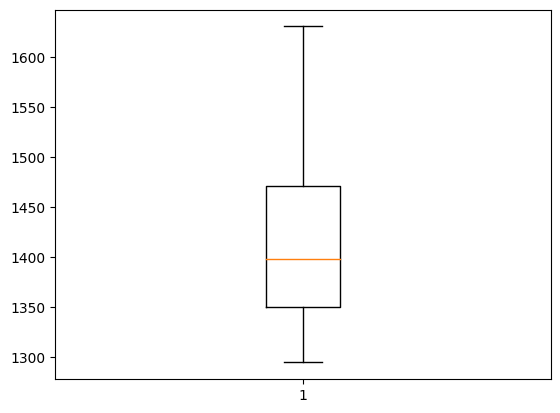

date         0
Cleveland    0
OH           0
US           0
year         0
dtype: int64


,date,Cleveland,OH,US,year
0,1999-12-31,1423.22662,316.3995,522.95270,1999
1,2000-12-31,1423.22662,334.1366,506.52990,2000
2,2001-12-31,1423.22662,351.3938,504.51850,2001
3,2002-12-31,1423.22662,351.7316,494.37710,2002
4,2003-12-31,1323.52500,333.8527,475.83510,2003
5,2004-12-31,1294.29330,338.7469,463.15560,2004
6,2005-12-31,1398.17170,350.1273,469.04280,2005
7,2006-12-31,1546.95990,361.4826,479.33540,2006
8,2007-12-31,1464.91830,355.4486,471.77390,2007
9,2008-12-31,1428.76260,352.0487,458.61420,2008


In [31]:
#Cleaning Crime data
print(crime_data.shape)
print(crime_data.isnull().sum())
#There is 4 null values in the cleveland column

#The first 4 rows contain our null values
print(crime_data)

#looking at the boxpot graph of our Cleveland data there are no outliar values
#it is acceptable to replace these values with the mean
plt.boxplot(crime_data['Cleveland'].iloc[4:])
plt.show()

crime_data['Cleveland'] = crime_data['Cleveland'].fillna(crime_data['Cleveland'].mean())

# I noticed that there is no record for 2015.
# I am going to take the middle value of 2014 and 2016 and use it as my 2015 value.
date = pd.to_datetime('2015-12-31')
Cleveland = (crime_data.loc[crime_data['year'] == 2014, 'Cleveland'].iloc[0] + crime_data.loc[crime_data['year'] == 2016, 'Cleveland'].iloc[0])/2
OH = (crime_data.loc[crime_data['year'] == 2014, 'OH'].iloc[0] + crime_data.loc[crime_data['year'] == 2016, 'OH'].iloc[0])/2
US = (crime_data.loc[crime_data['year'] == 2014, 'US'].iloc[0] + crime_data.loc[crime_data['year'] == 2016, 'US'].iloc[0])/2
year= 2015

crime_data.loc[len(crime_data.index)] = [date ,Cleveland, OH,US,year]
crime_data = crime_data.sort_values(by='year').reset_index(drop=True)

cleancrime = pd.DataFrame()
cleancrime = crime_data

print(cleancrime.isnull().sum())
cleancrime

In [33]:
#Merging the data and cleaning the merged data
data = pd.merge(cleancavs, cleancrime, left_on='EndYear', right_on='year', how='inner')

#Dropping with the redundant year column
data.drop('year', axis=1, inplace=True)

data.rename(columns={"Cleveland": "ClevelandCrime","OH": "OHCrime","US": "USCrime"},inplace=True)

data


,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel Pace,...,Playoffs,Coaches,Top WS,StartYear,EndYear,Lebron,date,ClevelandCrime,OHCrime,USCrime
0,2017-18,NBA,Cleveland Cavaliers*,50,32,0.610,1st of 5,0.59,98.0,0.7,...,1,T. Lue (50-32),L. James (14.0),2017,2018,1,2018-12-31,1449.56920,279.9364,380.55900
1,2016-17,NBA,Cleveland Cavaliers*,51,31,0.622,1st of 5,2.87,96.2,-0.2,...,1,T. Lue (51-31),L. James (12.9),2016,2017,1,2017-12-31,1556.76250,296.8160,394.85970
2,2015-16,NBA,Cleveland Cavaliers*,57,25,0.695,1st of 5,5.45,93.3,-2.5,...,1,"D. Blatt (30-11), T. Lue (27-14)",L. James (13.6),2015,2016,1,2016-12-31,1630.90620,307.6690,397.52080
3,2014-15,NBA,Cleveland Cavaliers*,53,29,0.646,1st of 5,4.08,92.3,-1.6,...,1,D. Blatt (53-29),K. Irving (10.4),2014,2015,1,2015-12-31,1482.62580,296.6732,379.53735
4,2013-14,NBA,Cleveland Cavaliers,33,49,0.402,3rd of 5,-3.86,93.1,-0.8,...,0,M. Brown (33-49),K. Irving (6.7),2013,2014,0,2014-12-31,1334.34540,285.6774,361.55390
5,2012-13,NBA,Cleveland Cavaliers,24,58,0.293,5th of 5,-4.87,92.3,0.3,...,0,B. Scott (24-58),K. Irving (5.3),2012,2013,0,2013-12-31,1477.71860,291.4102,369.13340
6,2011-12-01 00:00:00,NBA,Cleveland Cavaliers,21,45,0.318,5th of 5,-7.34,91.3,0.0,...,0,B. Scott (21-45),K. Irving (4.1),2011,2012,0,2012-12-31,1383.76410,301.4534,387.75380
7,2010-11-01 00:00:00,NBA,Cleveland Cavaliers,19,63,0.232,5th of 5,-8.88,93.0,0.9,...,0,B. Scott (19-63),R. Sessions (4.4),2010,2011,0,2011-12-31,1366.38580,305.1553,387.05970
8,2009-10-01 00:00:00,NBA,Cleveland Cavaliers*,61,21,0.744,1st of 5,6.17,91.4,-1.3,...,1,M. Brown (61-21),L. James (18.5),2009,2010,1,2010-12-31,1296.82050,314.6655,404.50230
9,2008-09-01 00:00:00,NBA,Cleveland Cavaliers*,66,16,0.805,1st of 5,8.68,88.7,-3.0,...,1,M. Brown (66-16),L. James (20.3),2008,2009,1,2009-12-31,1395.49620,331.8563,431.87870


I want to inspect and visualize the crime rate data for Cleveland, Ohio and the US.

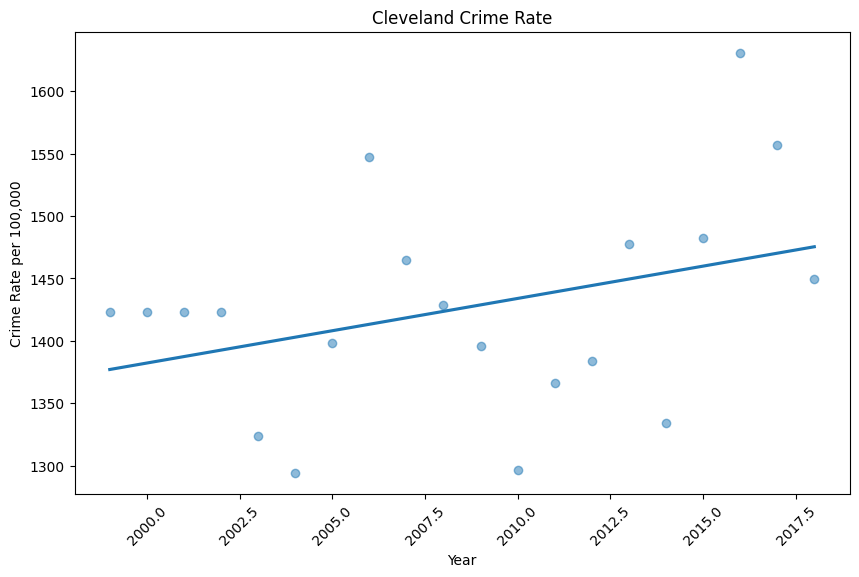

Cleveland AVG Crime Rate  1426.1965790000002
Max:  1630.9062


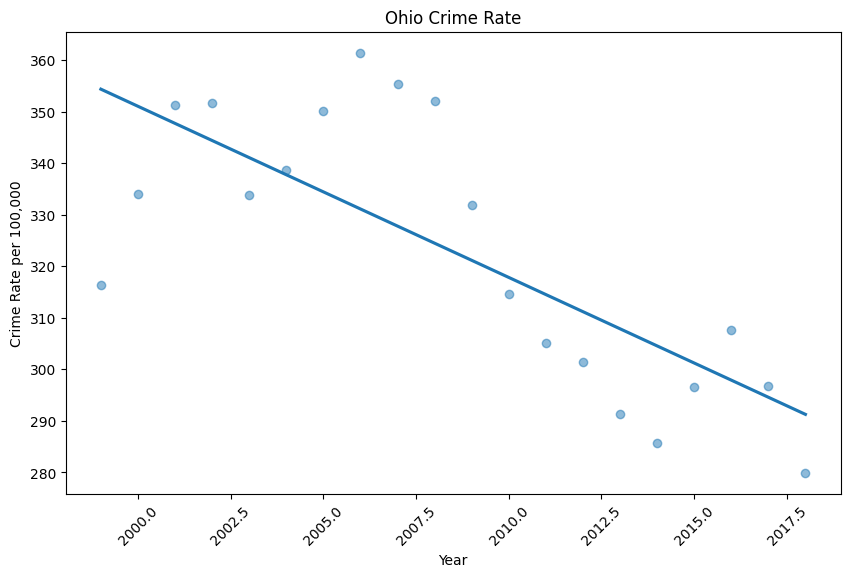

Ohio AVG Crime Rate 322.83404999999993
Max:  361.4826


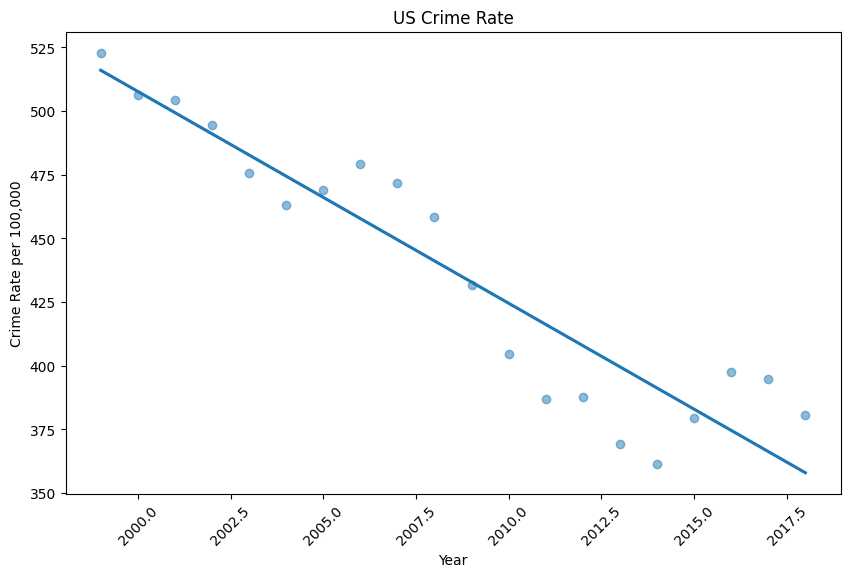

US AVG Crime Rate  437.02469249999996
Max:  522.9527


In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='Cleveland', data=cleancrime, ci=None, scatter_kws={'alpha':0.5})
plt.title('Cleveland Crime Rate')
plt.xlabel('Year')
plt.ylabel('Crime Rate per 100,000')
plt.xticks(rotation=45)
plt.show()
print('Cleveland AVG Crime Rate ',cleancrime['Cleveland'].mean())
print('Max: ', cleancrime['Cleveland'].max())

plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='OH', data=cleancrime, ci=None, scatter_kws={'alpha':0.5})
plt.title('Ohio Crime Rate')
plt.xlabel('Year')
plt.ylabel('Crime Rate per 100,000')
plt.xticks(rotation=45)
plt.show()
print('Ohio AVG Crime Rate',cleancrime['OH'].mean())
print('Max: ', cleancrime['OH'].max())

plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='US', data=cleancrime, ci=None, scatter_kws={'alpha':0.5})
plt.title('US Crime Rate')
plt.xlabel('Year')
plt.ylabel('Crime Rate per 100,000')
plt.xticks(rotation=45)
plt.show()
print('US AVG Crime Rate ',cleancrime['US'].mean())
print('Max: ', cleancrime['US'].max())

Cleveland AVG Crime Rate  1426.1965790000002  
Max:  1630.9062

Ohio AVG Crime Rate 322.83404999999993  
Max:  361.4826

US AVG Crime Rate  437.02469249999996  
Max:  522.9527

We can see that Clevland's crime rate is, on average, 4x the state average and 3x higher than the national average.

Also, Cleveland's crime rate shows a slightly increasing trend, unlike the state of Ohio and the Country as a whole, which has a strong decreasing trend.

Next, I want to examine Lebron James' impact on the Cavaliers.

Lebron
0    1
1    9
Name: Playoffs, dtype: int64


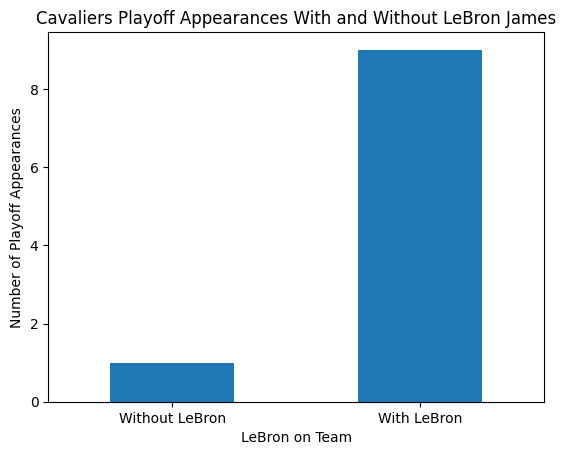

In [36]:
filteredCleancavs = cleancavs[cleancavs['StartYear'] >= 2003]
impact = filteredCleancavs.groupby('Lebron')['Playoffs'].sum()

print(impact)

impact.plot(kind='bar')
plt.title('Cavaliers Playoff Appearances With and Without LeBron James')
plt.xlabel('LeBron on Team')
plt.ylabel('Number of Playoff Appearances')
plt.xticks(ticks=[0, 1], labels=['Without LeBron', 'With LeBron'], rotation=0)
plt.show()


Looking at the chart we can see since lebron has been in the league the Cavs have only made it to the playoffs once without him showing he has a huge impact on the team.

Next, I want to plot their win-loss ratios and see which seasons Lebron was a part of.

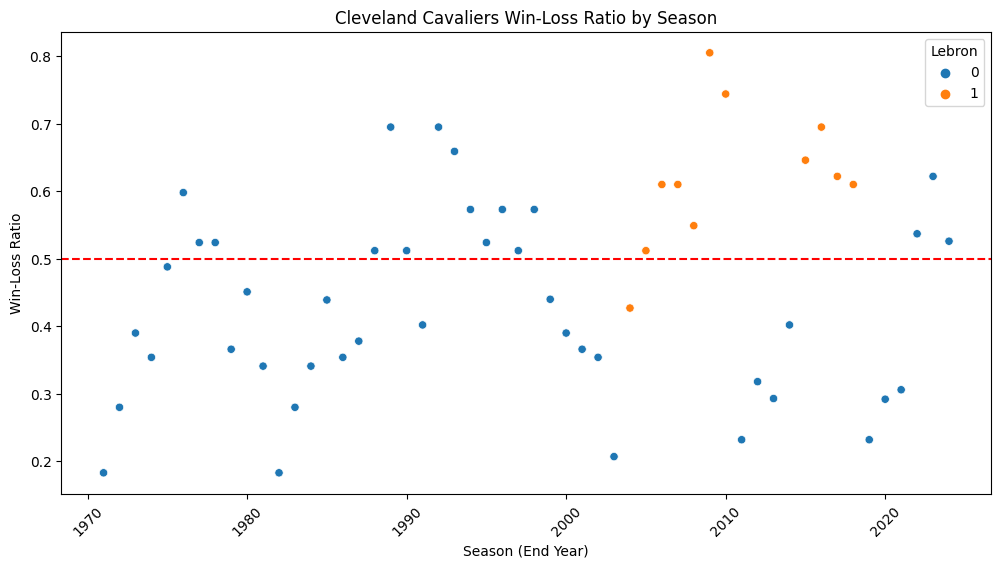

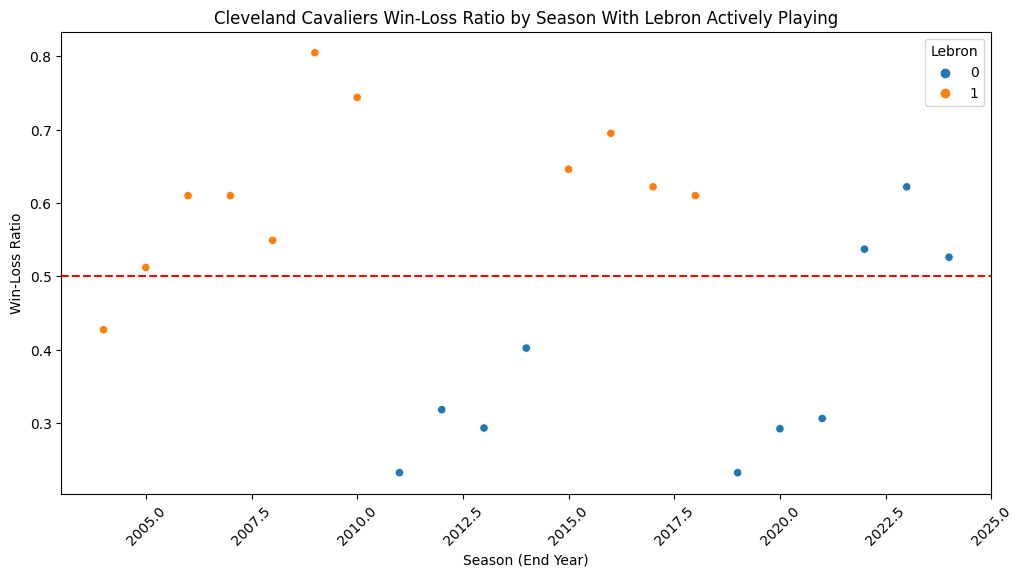

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='EndYear', y='W/L%', hue='Lebron', data=cleancavs)
plt.title('Cleveland Cavaliers Win-Loss Ratio by Season')
plt.xlabel('Season (End Year)')
plt.ylabel('Win-Loss Ratio')
plt.xticks(rotation=45)
plt.axhline(0.500, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='EndYear', y='W/L%', hue='Lebron', data=filteredCleancavs)
plt.title('Cleveland Cavaliers Win-Loss Ratio by Season With Lebron Actively Playing')
plt.xlabel('Season (End Year)')
plt.ylabel('Win-Loss Ratio')
plt.xticks(rotation=45)
plt.axhline(0.500, color='red', linestyle='--')
plt.show()

Orange represents if Lebron played on the Cavs team, and blue is when he didn't play on the Cavs.  
The Red line represents 0.500, which means if you are above that line, you have more wins than losses and vice versa.

The first graph is every season the Cavs have played in the NBA, dating back to 1970, and the second graph is filtered with only the points when Lebron is active in the league.

This graph details when Lebron plays for the Cavs. They are always above 0.500, except for one instance, which was his first year in the league.

Right after 2010 and 2017, we saw massive dips in win-loss percentage. There is also a relation to blue dots, meaning those are the years Lebron left the Cavs, providing a correlation between win-loss percentage and Lebron being on the team.

Next, I want to explore crime rates and the Cav's success.

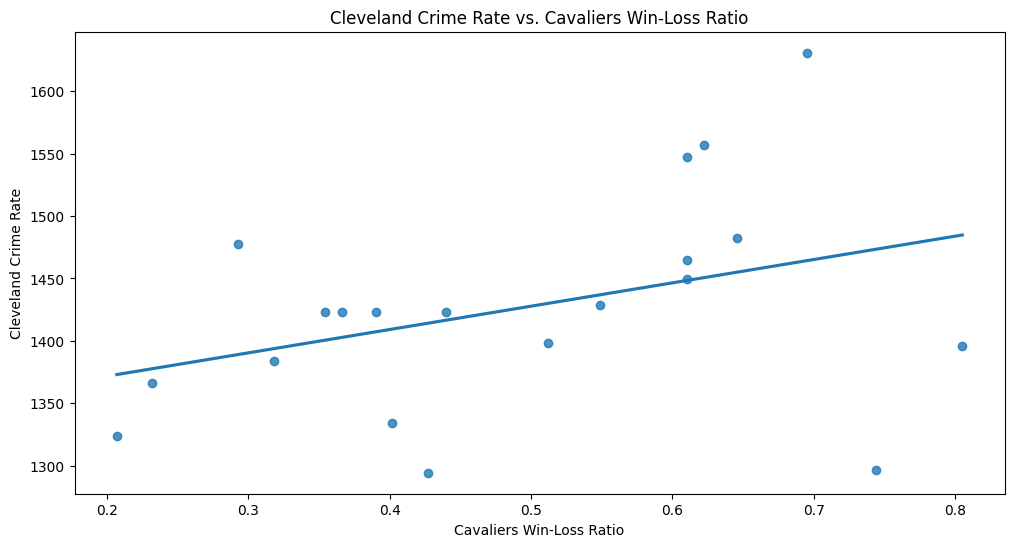


Correlation Coefficient: 0.37441842068223313, P-value: 0.10385814804489474


In [40]:
#Win / loss ratio and crime rate analysis

plt.figure(figsize=(12, 6))
sns.regplot(x='W/L%', y='ClevelandCrime', data=data, ci=None)
plt.title('Cleveland Crime Rate vs. Cavaliers Win-Loss Ratio')
plt.xlabel('Cavaliers Win-Loss Ratio')
plt.ylabel('Cleveland Crime Rate')
plt.show()

correlation_coef, p_value = pearsonr(data['W/L%'], data['ClevelandCrime'])
print(f"\nCorrelation Coefficient: {correlation_coef}, P-value: {p_value}")


##Looking at total W/L% vs Clevland crime rates, we can see a very moderate positive Correlation Coefficient with 0.37 and a p-value of 0.10, so it is not statistically sufficient to show no correlation.

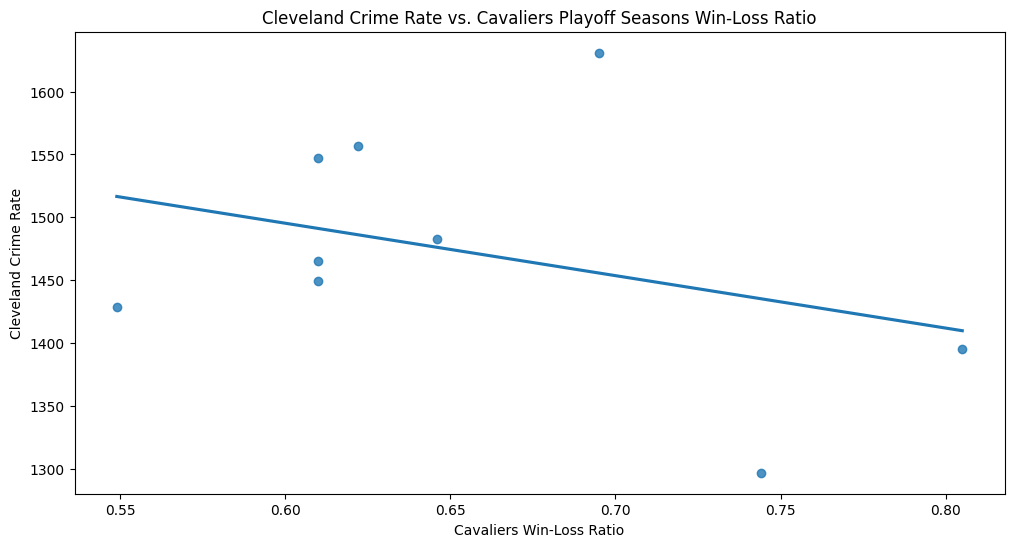


Correlation Coefficient: -0.3374924765255761, P-value: 0.3744260643822905


In [41]:
#Win / loss ratio and crime rate analysis only playoff seasons

playoffSeasons = data[data['Playoffs'] == 1]

plt.figure(figsize=(12, 6))
sns.regplot(x='W/L%', y='ClevelandCrime', data=playoffSeasons, ci=None)
plt.title('Cleveland Crime Rate vs. Cavaliers Playoff Seasons Win-Loss Ratio')
plt.xlabel('Cavaliers Win-Loss Ratio')
plt.ylabel('Cleveland Crime Rate')
plt.show()

Playcorrelation_coef, Playp_value = pearsonr(playoffSeasons['W/L%'], playoffSeasons['ClevelandCrime'])
print(f"\nCorrelation Coefficient: {Playcorrelation_coef}, P-value: {Playp_value}")


## Looking at the W/L% for only playoff years vs Clevland crime rates, we can see a weak negative Correlation Coefficient with -0.33 and a p-value of 0.37, so it is not statistically sufficient to show no correlation.

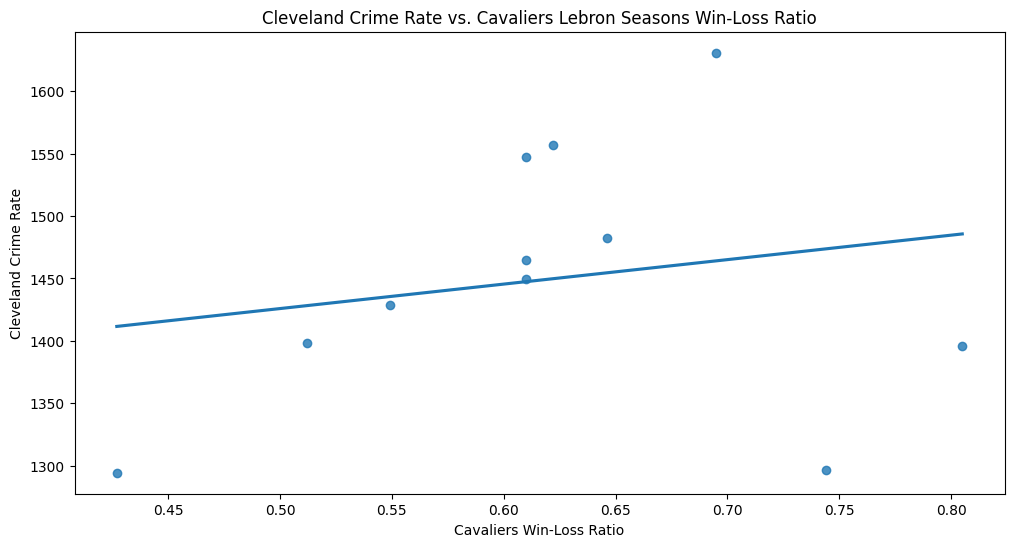


Correlation Coefficient: 0.1974535145555295, P-value: 0.5605943545477473


In [42]:
#Win / loss ratio and crime rate analysis only seasons with Lebron on the team

LebronSeasons = data[data['Lebron'] == 1]

plt.figure(figsize=(12, 6))
sns.regplot(x='W/L%', y='ClevelandCrime', data=LebronSeasons, ci=None)
plt.title('Cleveland Crime Rate vs. Cavaliers Lebron Seasons Win-Loss Ratio')
plt.xlabel('Cavaliers Win-Loss Ratio')
plt.ylabel('Cleveland Crime Rate')
plt.show()

Lcorrelation_coef, Lp_value = pearsonr(LebronSeasons['W/L%'], LebronSeasons['ClevelandCrime'])
print(f"\nCorrelation Coefficient: {Lcorrelation_coef}, P-value: {Lp_value}")

## Looking at the W/L% for only years when Lebron James was on the roster vs Clevland crime rates, we can see a weak positive Correlation Coefficient with 0.20 and a p-value of 0.56, so it is not statistically sufficient to show no correlation.

In [44]:
from google.colab import output
output.enable_custom_widget_manager()

In [45]:
#This works in google Collab but noot vscode
def create_figure(analysis_type):
    fig = go.Figure()

    if analysis_type == 'Win-Loss Ratio vs. Crime Rate':

        fig.add_trace(go.Scatter(x=data['W/L%'], y=data['ClevelandCrime'], mode='markers'))
        fig.update_layout(
            title='Win-Loss Ratio vs. Cleveland Crime Rate',
            xaxis_title='Win-Loss Ratio',
            yaxis_title='Cleveland Crime Rate'
        )

    elif analysis_type == 'Playoff Seasons vs. Crime Rate':

        fig.add_trace(go.Scatter(x=playoffSeasons['W/L%'], y=playoffSeasons['ClevelandCrime'], mode='markers'))
        fig.update_layout(
            title='Playoff Seasons Win-Loss Ratio vs. Cleveland Crime Rate',
            xaxis_title='Win-Loss Ratio in Playoff Seasons',
            yaxis_title='Cleveland Crime Rate'
        )

    elif analysis_type == 'LeBron Seasons vs. Crime Rate':

        fig.add_trace(go.Scatter(x=LebronSeasons['W/L%'], y=LebronSeasons['ClevelandCrime'], mode='markers'))
        fig.update_layout(
            title='LeBron Seasons Win-Loss Ratio vs. Cleveland Crime Rate',
            xaxis_title='Win-Loss Ratio in LeBron Seasons',
            yaxis_title='Cleveland Crime Rate'
        )
    return fig


dropdown = widgets.Dropdown(
    options=['Win-Loss Ratio vs. Crime Rate', 'Playoff Seasons vs. Crime Rate', 'LeBron Seasons vs. Crime Rate'],
    value='Win-Loss Ratio vs. Crime Rate',
    description='Graph:'
)


def on_dropdown_change(change):
    new_fig = create_figure(change.new)

    with fig.batch_update():
        for i in range(len(fig.data)):
            fig.data[i].x = new_fig.data[i].x
            fig.data[i].y = new_fig.data[i].y

        fig.update_layout(title=new_fig.layout.title,
                          xaxis=new_fig.layout.xaxis,
                          yaxis=new_fig.layout.yaxis)


fig = go.FigureWidget(create_figure(dropdown.value))
dropdown.observe(on_dropdown_change, names='value')
display(dropdown)
display(fig)


Dropdown(description='Graph:', options=('Win-Loss Ratio vs. Crime Rate', 'Playoff Seasons vs. Crime Rate', 'Le…

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': '38d1c473-f2dc-4384-abac-9406198cf455',
              'x': array([0.61 , 0.622, 0.695, 0.646, 0.402, 0.293, 0.318, 0.232, 0.744, 0.805,
                          0.549, 0.61 , 0.61 , 0.512, 0.427, 0.207, 0.354, 0.366, 0.39 , 0.44 ]),
              'y': array([1449.5692 , 1556.7625 , 1630.9062 , 1482.6258 , 1334.3454 , 1477.7186 ,
                          1383.7641 , 1366.3858 , 1296.8205 , 1395.4962 , 1428.7626 , 1464.9183 ,
                          1546.9599 , 1398.1717 , 1294.2933 , 1323.525  , 1423.22662, 1423.22662,
                          1423.22662, 1423.22662])}],
    'layout': {'template': '...',
               'title': {'text': 'Win-Loss Ratio vs. Cleveland Crime Rate'},
               'xaxis': {'title': {'text': 'Win-Loss Ratio'}},
               'yaxis': {'title': {'text': 'Cleveland Crime Rate'}}}
})

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

## Takeaways

From our analysis, we learned that Cleveland's crime rate per 100,000 people is well above that of Ohio and the nation.

We also learn that Lebron James greatly impacted the Cleveland Cavalier's success, leading them to 9 playoff appearances and only 1 season below 0.500 (more losses than wins).

Combing the data, I wanted to see if:
1. was there any correlation between the Cavilers success and lowering Cleveland's crime rate
2. was there any correlation between the Cavilers Playoff years and lowering the crime rate
3. there was any correlation between a figurehead like  Lebron James and lowering Cleveland's crime rate

Our results showed insufficient data, which suggests a correlation between the Cavilers' success, the Cavilers Playoff, and a figurehead like  Lebron James lowering Violent crime in Cleveland, Ohio.